In [12]:
import pandas as pd
import numpy as np

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [14]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


In [15]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [ ]:
# 1번 연간 서울교통공사 매출액 및 손실율 추이 파악 (2017-2021)
# 활용 데이터 서울교통공사 재무제표(2017-2021) → 연간 매출액 및 적자비용 추출
# 단위 백만원 
#2017년 자료 2017.05.31~2017.12.31

In [17]:
data = {'2017':[1145373, 407415], 
       '2018':[1986511, 538892], 
       '2019':[2004643, 586467], 
       '2020':[1559524, 1113736], 
       '2021':[1629129, 964440]}

In [44]:
budget= pd.DataFrame(data=data, index=['매출액', '손실액'])
budget

,2017,2018,2019,2020,2021
매출액,1145373,1986511,2004643,1559524,1629129
손실액,407415,538892,586467,1113736,964440


<AxesSubplot:>

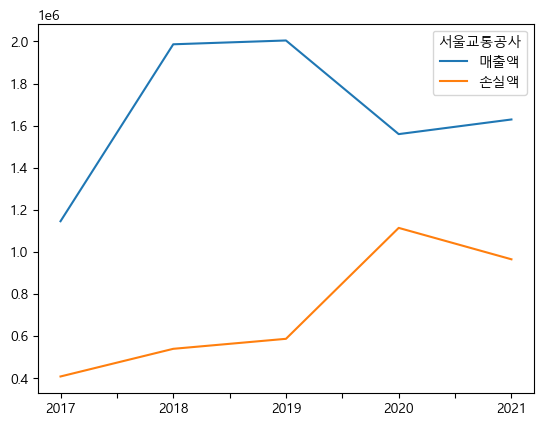

In [101]:
budget.T.plot()

In [120]:
lratio = round(budget.iloc[1] / budget.iloc[0]*100, 2)
lratio

2017    35.57
2018    27.13
2019    29.26
2020    71.42
2021    59.20
dtype: float64

In [121]:
# budget[:'손실비율'].T = lratio
# budget.loc[2]=[lratio]
budget2= budget.append(lratio, ignore_index=True)
budget2

C:\Users\82102\AppData\Local\Temp\ipykernel_14600\3534758734.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  budget2= budget.append(lratio, ignore_index=True)


,2017,2018,2019,2020,2021
0,1145373.00,1986511.00,2004643.00,1559524.00,1629129.0
1,407415.00,538892.00,586467.00,1113736.00,964440.0
2,35.57,27.13,29.26,71.42,59.2


In [54]:
# budget2=budget.T
# budget3=pd.concat([budget2,lratio])
# budget3.T

,2017,2018,2019,2020,2021,2017,2018,2019,2020,2021
매출액,1145373.0,1986511.0,2004643.0,1559524.0,1629129.0,NaN,NaN,NaN,NaN,NaN
손실액,407415.0,538892.0,586467.0,1113736.0,964440.0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,35.57,27.13,29.26,71.42,59.2


In [122]:
budget3= budget2.rename(index={0:'매출액', 1:'손실액', 2:'손실비율'})
budget3.index.name='서울교통공사'
budget3

,2017,2018,2019,2020,2021
서울교통공사,,,,,
매출액,1145373.00,1986511.00,2004643.00,1559524.00,1629129.0
손실액,407415.00,538892.00,586467.00,1113736.00,964440.0
손실비율,35.57,27.13,29.26,71.42,59.2


In [123]:
#증감율 [(최종수치-최초수치)/최초수치]*100
hl18=round((27.13-35.57)/35.57*100, 2)
hl19=round((29.26-27.13)/27.13*100, 2)
hl20=round((71.42-29.26)/29.26*100, 2)
hl21=round((59.2-71.42)/71.42*100, 2)

In [124]:
budget3.loc['손실비율증감']=[np.nan, hl18, hl19, hl20, hl21]
budget3

,2017,2018,2019,2020,2021
서울교통공사,,,,,
매출액,1145373.00,1986511.00,2004643.00,1559524.00,1629129.00
손실액,407415.00,538892.00,586467.00,1113736.00,964440.00
손실비율,35.57,27.13,29.26,71.42,59.20
손실비율증감,NaN,-23.73,7.85,144.09,-17.11


In [125]:
budget4=budget3.fillna(0)
budget4

,2017,2018,2019,2020,2021
서울교통공사,,,,,
매출액,1145373.00,1986511.00,2004643.00,1559524.00,1629129.00
손실액,407415.00,538892.00,586467.00,1113736.00,964440.00
손실비율,35.57,27.13,29.26,71.42,59.20
손실비율증감,0.00,-23.73,7.85,144.09,-17.11


In [135]:
budget5=budget4.T
budget5

서울교통공사,매출액,손실액,손실비율,손실비율증감
2017,1145373.0,407415.0,35.57,0.00
2018,1986511.0,538892.0,27.13,-23.73
2019,2004643.0,586467.0,29.26,7.85
2020,1559524.0,1113736.0,71.42,144.09
2021,1629129.0,964440.0,59.20,-17.11


In [127]:
budget6=budget5[['손실비율증감']]
budget6.columns.name='연도'
budget6

연도,손실비율증감
2017,0.00
2018,-23.73
2019,7.85
2020,144.09
2021,-17.11


In [129]:
budget7=budget5[['손실비율']]
budget7.columns.name='연도'
budget7

연도,손실비율
2017,35.57
2018,27.13
2019,29.26
2020,71.42
2021,59.20


<AxesSubplot:>

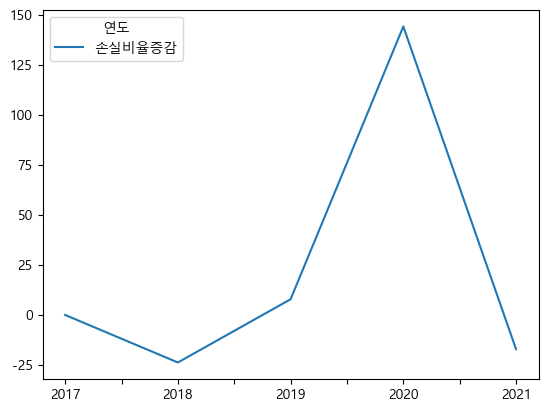

In [128]:
budget6.plot()

<AxesSubplot:>

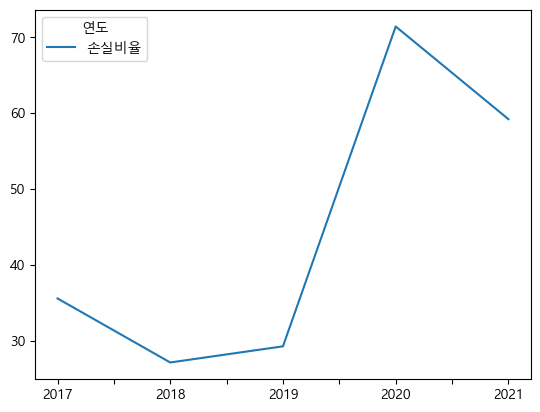

In [130]:
budget7.plot()

In [131]:
budget8=budget5[['손실비율','손실비율증감']]
budget8.columns.name='연도'
budget8

연도,손실비율,손실비율증감
2017,35.57,0.00
2018,27.13,-23.73
2019,29.26,7.85
2020,71.42,144.09
2021,59.20,-17.11


In [137]:
budget9=budget8.T
budget9.index.name='서울교통공사'
budget9

,2017,2018,2019,2020,2021
서울교통공사,,,,,
손실비율,35.57,27.13,29.26,71.42,59.20
손실비율증감,0.00,-23.73,7.85,144.09,-17.11


<AxesSubplot:>

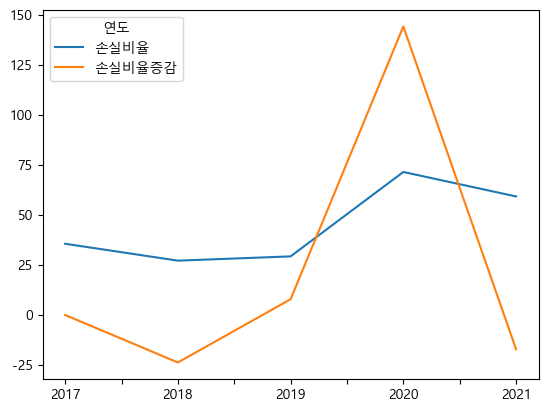

In [132]:
budget8.plot()

In [6]:
seoul_count = pd.read_csv("teamproject/인구추이(주민등록인구)_20230207155306.csv",encoding='utf-8'
                  )
seoul_count

,구분별(1),구분별(2),1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,인구,소계,9501413,9639110,9798542,9991089,10286503,10576794,10612577,10904527,10969862,10925464,10798700,10595943,10469852,10389057,10321496,10321449,10373234,10331244,10280523,10276968,10287847,10297004,10356202,10421782,10456034,10464051,10575447,10528774,10442426,10388055,10369593,10297138,10204057,10124579,10049607,10010983,9911088,9736027,9667669
1,인구,한국인,9491503,9625755,9786536,9979577,10276308,10566447,10603250,10873055,10935230,10889499,10759454,10550871,10418076,10336134,10270506,10264260,10311314,10263336,10207295,10174086,10173162,10167344,10181166,10192710,10200827,10208302,10312545,10249679,10195318,10143645,10103233,10022181,9930616,9857426,9765623,9729107,9668465,9509458,9428372
2,65세이상고령자,소계,275165,211283,304923,329370,348543,362507,362653,424332,434348,445236,454007,460144,469079,485347,505438,530190,560446,585897,612783,649755,693225,735902,786580,852235,898700,942946,1007572,1049425,1110995,1167177,1221616,1267563,1300877,1365126,1416131,1485272,1568331,1605416,1667411


In [6]:
seoul_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분별(1)  3 non-null      object
 1   구분별(2)  3 non-null      object
 2   1984    3 non-null      int64 
 3   1985    3 non-null      int64 
 4   1986    3 non-null      int64 
 5   1987    3 non-null      int64 
 6   1988    3 non-null      int64 
 7   1989    3 non-null      int64 
 8   1990    3 non-null      int64 
 9   1991    3 non-null      int64 
 10  1992    3 non-null      int64 
 11  1993    3 non-null      int64 
 12  1994    3 non-null      int64 
 13  1995    3 non-null      int64 
 14  1996    3 non-null      int64 
 15  1997    3 non-null      int64 
 16  1998    3 non-null      int64 
 17  1999    3 non-null      int64 
 18  2000    3 non-null      int64 
 19  2001    3 non-null      int64 
 20  2002    3 non-null      int64 
 21  2003    3 non-null      int64 
 22  2004    3 non-null      int64 

In [22]:
seoul_count.isnull().sum()

구분별(1)    0
구분별(2)    0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64

In [24]:
seoul_count.isna().sum()

구분별(1)    0
구분별(2)    0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
2018      0
2019      0
2020      0
2021      0
2022      0
dtype: int64

In [7]:
seoul_count.index

RangeIndex(start=0, stop=3, step=1)

In [8]:
seoul_count1=seoul_count.drop(1)
seoul_count1

,구분별(1),구분별(2),1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,인구,소계,9501413,9639110,9798542,9991089,10286503,10576794,10612577,10904527,10969862,10925464,10798700,10595943,10469852,10389057,10321496,10321449,10373234,10331244,10280523,10276968,10287847,10297004,10356202,10421782,10456034,10464051,10575447,10528774,10442426,10388055,10369593,10297138,10204057,10124579,10049607,10010983,9911088,9736027,9667669
2,65세이상고령자,소계,275165,211283,304923,329370,348543,362507,362653,424332,434348,445236,454007,460144,469079,485347,505438,530190,560446,585897,612783,649755,693225,735902,786580,852235,898700,942946,1007572,1049425,1110995,1167177,1221616,1267563,1300877,1365126,1416131,1485272,1568331,1605416,1667411


In [11]:
seoul_count2=seoul_count1.T
seoul_count2

,0,2
구분별(1),인구,65세이상고령자
구분별(2),소계,소계
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332


In [23]:

seoul_count2=seoul_count2.drop(['구분별(1)','구분별(2)'])
seoul_count2

,0,2
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332
1992,10969862,434348
1993,10925464,445236


In [25]:
seoul_count3=seoul_count2.rename(columns={0:'서울시 인구수',2:'65세이상 고령자'})
seoul_count3

,서울시 인구수,65세이상 고령자
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332
1992,10969862,434348
1993,10925464,445236


In [26]:
seoul_count3

,서울시 인구수,65세이상 고령자
1984,9501413,275165
1985,9639110,211283
1986,9798542,304923
1987,9991089,329370
1988,10286503,348543
1989,10576794,362507
1990,10612577,362653
1991,10904527,424332
1992,10969862,434348
1993,10925464,445236


<AxesSubplot:>

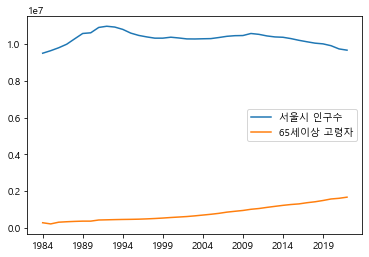

In [28]:
seoul_count3.plot()

In [193]:
seoul_old = pd.read_csv("teamproject/무임승차_대상별_현황_20230206161601.csv",encoding='cp949'
                  )
seoul_old

,운영기관별(1),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,...,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,...,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),...,무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
2,합계,-,-,-,-,-,-,-,-,-,-,465831,625632,380263,510596,79858,107380,5392,7257,318,399,497095,666935,408946,548561,...,110617,5497,7348,327,409,358371,459355,293476,376924,60612,76881,3918,5075,365,475,380197,510236,315412,423193,60463,81260,3855,5168,467,615
3,서울교통공사,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,...,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-
4,서울메트로 9호선(주),12440,15550,9746,12182,2529,3161,165,206,-,-,12824,16030,10156,12694,2508,3136,160,200,-,-,13750,17188,11024,13780,...,3183,180,225,-,-,9900,12375,7863,9829,1888,2360,133,166,16,20,10682,13352,8655,10819,1877,2346,133,166,17,21
5,서울교통공사9호선운영부문,1350,1688,1103,1379,228,285,19,24,-,-,1668,2085,1387,1734,252,315,29,36,-,-,4319,5399,3559,4449,...,725,180,225,-,-,3353,4191,2724,3406,459,573,170,212,-,-,3789,4736,3118,3897,485,606,186,233,-,-
6,부산교통공사,93418,124801,77631,103710,14854,19843,934,1248,-,-,95673,130636,79920,109126,14717,20095,1036,1415,-,-,102235,139620,85759,117118,...,20996,1102,1506,-,-,76634,104456,64212,87524,11611,15826,811,1106,-,-,80009,109034,67718,92284,11502,15675,789,1075,0,0
7,대구도시철도공사,43796,54745,36211,45264,7180,8975,405,506,-,-,45559,56949,37933,47416,7224,9030,402,503,-,-,49140,61425,41228,51535,...,9386,403,504,-,-,33314,41642,27784,34730,5268,6585,262,327,-,-,36742,45927,30933,38666,5540,6924,269,337,0,0
8,인천교통공사,18500,24975,14109,19047,4208,5681,183,247,-,-,20057,27077,15522,20955,4348,5870,187,252,-,-,21965,29653,17259,23300,...,6093,193,260,-,-,15745,-,12267,-,3347,-,131,-,-,-,17794,24022,14077,19004,3583,4838,134,180,0,0
9,광주광역시 도시철도공사,6202,8470,5092,6936,1017,1407,93,127,-,-,6326,8856,5262,7367,984,1378,80,111,-,-,6551,9172,5440,7616,...,1449,76,107,-,-,4468,6256,3625,5076,677,948,40,56,126,176,4564,6389,3660,5123,670,939,37,51,197,276


In [194]:
seoul_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   운영기관별(1)  16 non-null     object
 1   2017      16 non-null     object
 2   2017.1    16 non-null     object
 3   2017.2    16 non-null     object
 4   2017.3    16 non-null     object
 5   2017.4    16 non-null     object
 6   2017.5    16 non-null     object
 7   2017.6    16 non-null     object
 8   2017.7    16 non-null     object
 9   2017.8    16 non-null     object
 10  2017.9    16 non-null     object
 11  2018      16 non-null     object
 12  2018.1    16 non-null     object
 13  2018.2    16 non-null     object
 14  2018.3    16 non-null     object
 15  2018.4    16 non-null     object
 16  2018.5    16 non-null     object
 17  2018.6    16 non-null     object
 18  2018.7    16 non-null     object
 19  2018.8    16 non-null     object
 20  2018.9    16 non-null     object
 21  2019      16 non-n

In [201]:
seoul_old.columns

Index(['운영기관별(1)', '2017', '2017.1', '2017.2', '2017.3', '2017.4', '2017.5',
       '2017.6', '2017.7', '2017.8', '2017.9', '2018', '2018.1', '2018.2',
       '2018.3', '2018.4', '2018.5', '2018.6', '2018.7', '2018.8', '2018.9',
       '2019', '2019.1', '2019.2', '2019.3', '2019.4', '2019.5', '2019.6',
       '2019.7', '2019.8', '2019.9', '2020', '2020.1', '2020.2', '2020.3',
       '2020.4', '2020.5', '2020.6', '2020.7', '2020.8', '2020.9', '2021',
       '2021.1', '2021.2', '2021.3', '2021.4', '2021.5', '2021.6', '2021.7',
       '2021.8', '2021.9'],
      dtype='object')

In [202]:
seoul_old1=seoul_old.iloc[[0,1,3],0:]
seoul_old1

,운영기관별(1),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,...,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,...,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),...,무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
3,서울교통공사,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,...,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-


In [206]:
seoul_old1.index

Int64Index([0, 1, 3], dtype='int64')

In [207]:
seoul_old2 = seoul_old1.rename(index = {0:'종류',1:'무임비용',3:'비용'})
seoul_old2 

,운영기관별(1),2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,...,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
종류,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,...,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
무임비용,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),...,무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
비용,서울교통공사,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,...,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-


In [208]:
seuol_old3=seoul_old2.drop('운영기관별(1)',axis=1)
seuol_old3

,2017,2017.1,2017.2,2017.3,2017.4,2017.5,2017.6,2017.7,2017.8,2017.9,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
종류,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
무임비용,무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
비용,258250,350647,208466,283059,46405,63000,3379,4588,-,-,261047,353974,212843,288617,44967,60969,3237,4388,-,-,273841,370926,225094,304929,45644,61831,3103,4166,-,-,195690,264255,160053,216135,33460,45181,2177,2939,-,-,205748,278438,170771,231108,32868,44477,2109,2853,-,-


In [209]:
seuol_old3=seuol_old3.T
seuol_old3

,종류,무임비용,비용
2017,계,무임승차 (천명),258250
2017.1,계,무임비용 (백만원),350647
2017.2,노인,무임승차 (천명),208466
2017.3,노인,무임비용 (백만원),283059
2017.4,장애인,무임승차 (천명),46405
2017.5,장애인,무임비용 (백만원),63000
2017.6,국가유공자,무임승차 (천명),3379
2017.7,국가유공자,무임비용 (백만원),4588
2017.8,기타,무임승차 (천명),-
2017.9,기타,무임비용 (백만원),-


In [210]:
mark=(seuol_old3.종류 =='계')|(seuol_old3.종류 =='노인')
seuol_old3=seuol_old3[mark]

In [211]:
mark2 =(seuol_old3.무임비용 =='무임비용 (백만원)')
seuol_old4=seuol_old3[mark2]
seuol_old4=seuol_old4.T

In [212]:
seuol_old4=seuol_old4.drop('무임비용')
seuol_old4

,2017.1,2017.3,2018.1,2018.3,2019.1,2019.3,2020.1,2020.3,2021.1,2021.3
종류,계,노인,계,노인,계,노인,계,노인,계,노인
비용,350647,283059,353974,288617,370926,304929,264255,216135,278438,231108


In [213]:

total=seuol_old4.T
total

,종류,비용
2017.1,계,350647
2017.3,노인,283059
2018.1,계,353974
2018.3,노인,288617
2019.1,계,370926
2019.3,노인,304929
2020.1,계,264255
2020.3,노인,216135
2021.1,계,278438
2021.3,노인,231108


In [214]:
mark3=(total.종류 =='계')
total1 =total[mark3].T
total1

,2017.1,2018.1,2019.1,2020.1,2021.1
종류,계,계,계,계,계
비용,350647,353974,370926,264255,278438


In [215]:
total2 = total1.drop('종류')
total2

,2017.1,2018.1,2019.1,2020.1,2021.1
비용,350647,353974,370926,264255,278438


In [216]:
total2=total2.rename(index={'비용':'총 무임비용'})
total2

,2017.1,2018.1,2019.1,2020.1,2021.1
총 무임비용,350647,353974,370926,264255,278438


In [217]:
old=seuol_old4.T
old.columns

Index(['종류', '비용'], dtype='object')

In [218]:
mark4=(old.종류 == '노인')
old1=old[mark4].T
old1

,2017.3,2018.3,2019.3,2020.3,2021.3
종류,노인,노인,노인,노인,노인
비용,283059,288617,304929,216135,231108


In [219]:
old2 = old1.drop('종류')
old2

,2017.3,2018.3,2019.3,2020.3,2021.3
비용,283059,288617,304929,216135,231108


In [220]:
old2=old2.rename(index={'비용':'노인 무임 비용'})
old2

,2017.3,2018.3,2019.3,2020.3,2021.3
노인 무임 비용,283059,288617,304929,216135,231108


In [221]:
old2=old2.rename(columns={'2017.3':'2017','2018.3':'2018','2019.3':'2019','2020.3':'2020','2021.3':'2021',})
total2=total2.rename(columns={'2017.1':'2017','2018.1':'2018','2019.1':'2019','2020.1':'2020','2021.1':'2021',})
old2
total2

,2017,2018,2019,2020,2021
노인 무임 비용,283059,288617,304929,216135,231108


,2017,2018,2019,2020,2021
총 무임비용,350647,353974,370926,264255,278438


In [222]:
seoul_old5=pd.concat([old2,total2])
seoul_old5

,2017,2018,2019,2020,2021
노인 무임 비용,283059,288617,304929,216135,231108
총 무임비용,350647,353974,370926,264255,278438


In [223]:
seoul_old5=seoul_old5.astype(int)

In [224]:
seoul_old5=seoul_old5.T
seoul_old5

,노인 무임 비용,총 무임비용
2017,283059,350647
2018,288617,353974
2019,304929,370926
2020,216135,264255
2021,231108,278438


In [225]:
seoul_old5['비율']=round(seoul_old5['노인 무임 비용']/seoul_old5['총 무임비용']*100,2)
seoul_old5

,노인 무임 비용,총 무임비용,비율
2017,283059,350647,80.72
2018,288617,353974,81.54
2019,304929,370926,82.21
2020,216135,264255,81.79
2021,231108,278438,83.00


In [226]:
seoul_old6=pd.DataFrame(seoul_old5['비율'])
seoul_old6

,비율
2017,80.72
2018,81.54
2019,82.21
2020,81.79
2021,83.00


<AxesSubplot:>

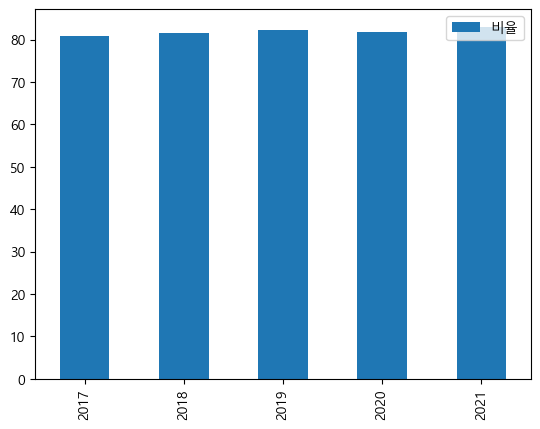

In [227]:
seoul_old6.plot.bar()

In [ ]:
#1,6번


In [228]:
loss=budget3.T
loss

연도,매출액,손실액,손실비율,손실비율증감
2017,1145373.0,407415.0,35.57,NaN
2018,1986511.0,538892.0,27.13,-23.73
2019,2004643.0,586467.0,29.26,7.85
2020,1559524.0,1113736.0,71.42,144.09
2021,1629129.0,964440.0,59.20,-17.11


In [229]:
loss.columns.name='연도'
loss

연도,매출액,손실액,손실비율,손실비율증감
2017,1145373.0,407415.0,35.57,NaN
2018,1986511.0,538892.0,27.13,-23.73
2019,2004643.0,586467.0,29.26,7.85
2020,1559524.0,1113736.0,71.42,144.09
2021,1629129.0,964440.0,59.20,-17.11


In [230]:
loss2=loss.drop('매출액',axis=1)
loss2

연도,손실액,손실비율,손실비율증감
2017,407415.0,35.57,NaN
2018,538892.0,27.13,-23.73
2019,586467.0,29.26,7.85
2020,1113736.0,71.42,144.09
2021,964440.0,59.20,-17.11


In [248]:
seoul_old5.rename(columns={'노인 무임 비용':'노인 무임비용'},inplace=True)
seoul_old5

,노인 무임비용,총 무임비용
2017,283059,350647
2018,288617,353974
2019,304929,370926
2020,216135,264255
2021,231108,278438


In [250]:
loss_free=pd.concat([loss2,seoul_old5],axis=1)
loss_free

,손실액,손실비율,손실비율증감,노인 무임비용,총 무임비용
2017,407415.0,35.57,NaN,283059,350647
2018,538892.0,27.13,-23.73,288617,353974
2019,586467.0,29.26,7.85,304929,370926
2020,1113736.0,71.42,144.09,216135,264255
2021,964440.0,59.20,-17.11,231108,278438


In [ ]:
# 결측치0

In [ ]:
loss_free['적자 대비 무임비용']='총 무임비용'/'손실액'
loss_free['적자 대비 노인 무임비용']='노인 무임비용'/'손실액' 